## p.87 ~ 122

### chapter 3 : 기계학습과 인식

### * iris 데이터 셋
- attribute:
    - sepal length
    - sepal width
    - petal length
    - petal width
    
- class:
    - Iris-Setosa
    - Iris-Versicolour
    - Iris-Virginica

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### [1] 특징 vector 추출

* 4차원 feature vector

* classification 문제이기 때문에 y는 one-hot encoding으로 표현한다.

In [4]:
for i in range(5):
    print(i+1, data.data[i], data.target[i])

1 [5.1 3.5 1.4 0.2] 0
2 [4.9 3.  1.4 0.2] 0
3 [4.7 3.2 1.3 0.2] 0
4 [4.6 3.1 1.5 0.2] 0
5 [5.  3.6 1.4 0.2] 0


In [28]:
irisDF = pd.DataFrame(data.data,columns=data.feature_names)

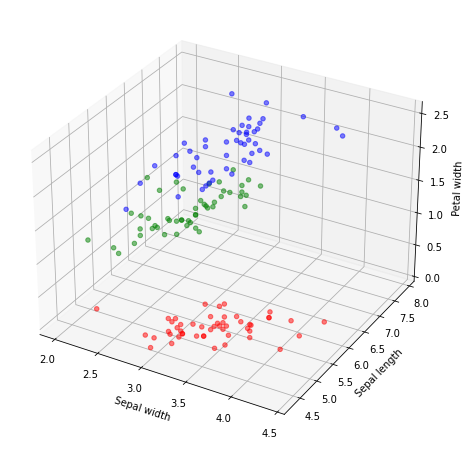

In [39]:
# 데이터 분포 확인
color=[]
for n in data.target:
    if n==0:
        color.append('r') # 0 - Setosa
    elif n==1:
        color.append('g') # 1- Versicolour
    else:
        color.append('b') # 2 - Virginica
fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d' )
ax.scatter(xs=irisDF['sepal width (cm)'], ys=irisDF['sepal length (cm)'],
           zs=irisDF['petal width (cm)'],  alpha=0.5,c=color)
ax.set_xlabel('Sepal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal width')
plt.show()

* Setosa (red) : petal_width (아래), sepal_width (-), sepal_length (),
* Versicolour (green) : petal_width (중간),sepal_width (-),
* Virginica (blue) : petal_width (위), sepal_width (-),

#### [2] 모델링과 예측
* [3-1] 사용할 모델 : SVM(Support Vector Machine)

In [10]:
from sklearn import svm

classifier = svm.SVC(gamma=0.1, C=10)
classifier.fit(data.data, data.target)

SVC(C=10, gamma=0.1)

In [11]:
new_data = [[6.4, 3.2, 6.0, 2.5], [7.1, 3.1, 4.7, 1.35]]

res = classifier.predict(new_data)
print("새로운 2개의 샘플 분류 : ", res)

새로운 2개의 샘플 분류 :  [2 1]


### * MNIST 숫자

In [43]:
from sklearn import datasets

digit = datasets.load_digits()

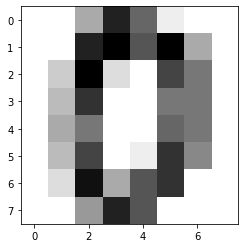

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
이 숫자는 :  0 입니다.


In [50]:
plt.figure(figsize=(4, 4))
plt.imshow(digit.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()
print(digit.data[0])
print("이 숫자는 : ", digit.target[0], "입니다.")

#### [1] 특징 vector

In [46]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [48]:
len(digit.data)

1797

In [47]:
# 즉, 64개 화소의 값을 출력함
len(digit.data[0])

64

* MNIST는 64차원의 1797개 특징 벡터로 모델링을 진행한다

#### [2] 모델링과 예측
* [2-1] 사용할 모델 : SVM(Support Vector Machine)

In [51]:
from sklearn import svm

classifier = svm.SVC(gamma=0.1, C=10)
classifier.fit(digit.data, digit.target)

SVC(C=10, gamma=0.1)

In [53]:
new_data = [digit.data[0], digit.data[1], digit.data[2]]

res = classifier.predict(new_data)
print("새로운 2개의 샘플 분류 : ", res)

새로운 2개의 샘플 분류 :  [0 1 2]


#### [3] 데이터를 훈련, 테스트 집합으로 나눠서 훈련하기

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

In [55]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1078
1078
719
719


In [56]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

SVC(gamma=0.001)

#### [4] test 집합을 기반으로 성능 측정하기

In [57]:
res = classifier.predict(x_test)

* 혼동 행렬 이용
- class(정답) 은 10개 (0 ~ 9)이다.
- 그렇기 때문에 혼동 행렬은 10*10 행렬이다.
- 혼동 행렬 각 값은 nij => n번째 샘플에서 모델이 예측한 결과 i, 실제 결과 j이다

In [60]:
confusion_matrix = np.zeros((10, 10))

for i in range(len(res)):
    confusion_matrix[res[i]][y_test[i]] += 1 # 예측한 결과 class, 실제 결과 j

In [61]:
confusion_matrix

array([[71.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 73.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.],
       [ 0.,  0., 76.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 75.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0., 63.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., 72.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 68.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 64.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 79.]])

* 정확도 측정 => 대각선 샘플 수 / 전체 샘플 수
* 대각선이 내가 맞춘 개수이니까!

In [62]:
correct = 0

for i in range(10):
    correct += confusion_matrix[i][i] # 대각선

print("정확도 : ", (correct/len(res))*100)

정확도 :  98.88734353268428


#### [5] 교차 검증 사용

In [65]:
classifier = svm.SVC(gamma=0.001)

In [66]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(classifier, digit.data, digit.target, cv=5) # 5-겹 교차 검증 사용 => 5개의 정확도 나옴


In [67]:
accuracy

array([0.975     , 0.95      , 0.98328691, 0.99164345, 0.96100279])

In [68]:
# 이 5개의 정확도의 평균이 이 모델의 성능이다!
print("정확도 평균 : ", accuracy.mean()*100, accuracy.std())

정확도 평균 :  97.21866295264624 0.015013488295959767
